# HW15 6380044626 Kunthida Hongsupangpan

In [143]:
import pandas as pd
import numpy as np
import dataframe_image as dfi
from datetime import datetime
import networkx as nx

# Import data

In [144]:
sus_pur = pd.read_csv("Suspicious_purchases.csv",header=None)
sus_meets = pd.read_csv("Suspicious_meetings.csv", header=None)
sus_emails = pd.read_csv("Suspicious_emails.csv", header=None)
sus_calls = pd.read_csv("Suspicious_calls.csv", header=None)
com_index = pd.read_csv("CompanyIndex.csv")

# identify suspicious

In [145]:
sus_pur.rename(columns={0:'ID 1', 1:'Suspicious_type', 2:'ID 2', 3:'Index'}, inplace=True)
sus_meets.rename(columns={0:'ID 1', 1:'Suspicious_type', 2:'ID 2', 3:'Index'}, inplace=True)
sus_emails.rename(columns={0:'ID 1', 1:'Suspicious_type', 2:'ID 2', 3:'Index'}, inplace=True)
sus_calls.rename(columns={0:'ID 1', 1:'Suspicious_type', 2:'ID 2', 3:'Index'}, inplace=True)

sus_all = pd.DataFrame()
sus_all = sus_all.append([sus_pur, sus_meets, sus_emails, sus_calls])
sus_all.reset_index(inplace=True, drop=True)
sus_all['Index'] = pd.to_datetime(sus_all['Index'],unit='s')

sus_all

,ID 1,Suspicious_type,ID 2,Index
0,1847246,2,2038003,1972-05-13 00:45:33
1,857138,3,728286,1970-12-22 23:12:13
2,1108217,3,728286,1972-03-31 02:05:33
3,857138,3,1690582,1972-04-20 22:12:13
4,1690582,3,1847246,1972-04-25 13:18:53
...,...,...,...,...
132,1690582,0,1847246,1970-07-12 13:06:53
133,28520,0,1886447,1970-06-28 15:45:53
134,505444,0,1886447,1970-12-15 12:10:53
135,969089,0,1886447,1970-07-23 16:04:53


In [146]:
sus_id1 = sus_all['ID 1'].unique()
sus_id2 = sus_all['ID 2'].unique()
sus_id = np.append(sus_id1,sus_id2)
sus_id = pd.DataFrame(sus_id)[0].unique()
sus_id = pd.DataFrame(sus_id)
sus_id.rename(columns={0:'Suspicious ID'}, inplace=True)
suspicious = sus_id.merge(com_index, left_on='Suspicious ID', right_on='ID')
suspicious.drop(columns='ID', inplace=True)
suspicious

,Suspicious ID,first,last
0,1847246,Rosalia,Larroque
1,857138,Richard,Fox
2,1108217,Lindsy,Henion
3,1690582,Meryl,Pastuch
4,696047,Jose,Ringwald
5,728286,Kerstin,Belveal
6,1023940,Patrick,Lane
7,1642962,Glen,Grant
8,1663285,Sara,Ballard
9,234164,Ramiro,Gault


# วิเคราะห์เบื้องต้นด้วย Pivot table

# Check การติดต่อทั้งหมด ของ 20 คนที่ทุจริต และวิเคราะห์เบื้องต้น

In [147]:
purchase = pd.read_csv("purchases.csv", header=None)
purchase.rename(columns={0:'ID 1', 1:'Suspicious_type', 2:'ID 2', 3:'Index'}, inplace=True)
purchase['Index'] = pd.to_datetime(purchase['Index'],unit='s')

meeting = pd.read_csv("meetings.csv", header=None)
meeting.rename(columns={0:'ID 1', 1:'Suspicious_type', 2:'ID 2', 3:'Index'}, inplace=True)
meeting['Index'] = pd.to_datetime(meeting['Index'],unit='s')

email = pd.read_csv("emails.csv", header=None)
email.rename(columns={0:'ID 1', 1:'Suspicious_type', 2:'ID 2', 3:'Index'}, inplace=True)
email['Index'] = pd.to_datetime(email['Index'],unit='s')

call = pd.read_csv("calls.csv", header=None)
call.rename(columns={0:'ID 1', 1:'Suspicious_type', 2:'ID 2', 3:'Index'}, inplace=True)
call['Index'] = pd.to_datetime(call['Index'],unit='s')

##
id2_all = []
id1_all = []
list_ss = []
table = pd.DataFrame()

for i in range(len(suspicious['Suspicious ID'])):
    list_sss = []
    list_sss.append(suspicious.iloc[i][0])
    list_sss.append(suspicious.iloc[i][1])
    list_sss.append(suspicious.iloc[i][2])
    list_ss.append(list_sss)
    b = pd.DataFrame([list_ss[i]], columns=['Suspicious ID', 'First', 'Last'])

    id2 = purchase[suspicious['Suspicious ID'][i] == purchase['ID 1']]['ID 2'].values.tolist()
    id1 = purchase[suspicious['Suspicious ID'][i] == purchase['ID 2']]['ID 1'].values.tolist()
    t2 = purchase[suspicious['Suspicious ID'][i] == purchase['ID 1']]['Index'].tolist()
    t1 = purchase[suspicious['Suspicious ID'][i] == purchase['ID 2']]['Index'].tolist()

    if len(id2) >= 1 and len(id1) < 1 :
        list_s1 = []
        for i in range(len(id2)):
            list_idt = []
            list_idt.append(id2[i])
            list_idt.append(t2[i])
            list_s1.append(list_idt)
        a = pd.DataFrame(list_s1, columns=['ID','Time'])
        table1 = pd.concat([b,a],axis=1).fillna(method='ffill')
        table = pd.concat([table,table1], axis=0)
        
    elif len(id1) >= 1 and len(id2) < 1:
        list_s2 = []
        for i in range(len(id1)):
            list_idt = []
            list_idt.append(id1[i])
            list_idt.append(t1[i])
            list_s2.append(list_idt)
            a = pd.DataFrame(list_s2, columns=['ID','Time'])
        table2 = pd.concat([b,a],axis=1).fillna(method='ffill')
        table = pd.concat([table,table2], axis=0)
        
    elif len(id1) >= 1 and len(id2) >= 1:   
        list_s3 = []
        for i in range(len(id2)):
            list_idt = []
            list_idt.append(id2[i])
            list_idt.append(t2[i])
            list_s3.append(list_idt)
        for i in range(len(id1)):
            list_idt = []
            list_idt.append(id1[i])
            list_idt.append(t1[i])            
            list_s3.append(list_idt)
            
        a = pd.DataFrame(list_s3, columns=['ID','Time'])
        table1 = pd.concat([b,a],axis=1).fillna(method='ffill')
        table = pd.concat([table,table1], axis=0)
  
                
table['Type'] = 'S_Purchase'
inspect_purchase = table
inspect_purchase.reset_index(drop=True, inplace=True)
inspect_purchase

##
id2_all = []
id1_all = []
list_ss = []
table = pd.DataFrame()

for i in range(len(suspicious['Suspicious ID'])):
    list_sss = []
    list_sss.append(suspicious.iloc[i][0])
    list_sss.append(suspicious.iloc[i][1])
    list_sss.append(suspicious.iloc[i][2])
    list_ss.append(list_sss)
    b = pd.DataFrame([list_ss[i]], columns=['Suspicious ID', 'First', 'Last'])


    id2 = meeting[suspicious['Suspicious ID'][i] == meeting['ID 1']]['ID 2'].values.tolist()
    id1 = meeting[suspicious['Suspicious ID'][i] == meeting['ID 2']]['ID 1'].values.tolist()
    t2 = meeting[suspicious['Suspicious ID'][i] == meeting['ID 1']]['Index'].tolist()
    t1 = meeting[suspicious['Suspicious ID'][i] == meeting['ID 2']]['Index'].tolist()

    if len(id2) >= 1 and len(id1) < 1 :
        list_s1 = []
        for i in range(len(id2)):
            list_idt = []
            list_idt.append(id2[i])
            list_idt.append(t2[i])
            list_s1.append(list_idt)
        a = pd.DataFrame(list_s1, columns=['ID','Time'])
        table1 = pd.concat([b,a],axis=1).fillna(method='ffill')
        table = pd.concat([table,table1], axis=0)
        
    elif len(id1) >= 1 and len(id2) < 1:
        list_s2 = []
        for i in range(len(id1)):
            list_idt = []
            list_idt.append(id1[i])
            list_idt.append(t1[i])            
            list_s2.append(list_idt)
        a = pd.DataFrame(list_s2, columns=['ID','Time'])
        table2 = pd.concat([b,a],axis=1).fillna(method='ffill')
        table = pd.concat([table,table2], axis=0)
            
    elif len(id1) >= 1 and len(id2) >= 1:   
        list_s3 = []
        for i in range(len(id2)):
            list_idt = []
            list_idt.append(id2[i])
            list_idt.append(t2[i])
            list_s3.append(list_idt)
        for i in range(len(id1)):
            list_idt = []
            list_idt.append(id1[i])
            list_idt.append(t1[i])            
            list_s3.append(list_idt)
            
        a = pd.DataFrame(list_s3, columns=['ID','Time'])
        table1 = pd.concat([b,a],axis=1).fillna(method='ffill')
        table = pd.concat([table,table1], axis=0)
  
                
table['Type'] = 'S_Meeting'
inspect_meeting = table
inspect_meeting.reset_index(drop=True, inplace=True)
inspect_meeting

##
id2_all = []
id1_all = []
list_ss = []
table = pd.DataFrame()

for i in range(len(suspicious['Suspicious ID'])):
    list_sss = []
    list_sss.append(suspicious.iloc[i][0])
    list_sss.append(suspicious.iloc[i][1])
    list_sss.append(suspicious.iloc[i][2])
    list_ss.append(list_sss)
    b = pd.DataFrame([list_ss[i]], columns=['Suspicious ID', 'First', 'Last'])


    id2 = email[suspicious['Suspicious ID'][i] == email['ID 1']]['ID 2'].values.tolist()
    id1 = email[suspicious['Suspicious ID'][i] == email['ID 2']]['ID 1'].values.tolist()
    t2 = email[suspicious['Suspicious ID'][i] == email['ID 1']]['Index'].tolist()
    t1 = email[suspicious['Suspicious ID'][i] == email['ID 2']]['Index'].tolist()

    if len(id2) >= 1 and len(id1) < 1 :
        list_s1 = []
        for i in range(len(id2)):
            list_idt = []
            list_idt.append(id2[i])
            list_idt.append(t2[i])
            list_s1.append(list_idt)
        a = pd.DataFrame(list_s1, columns=['ID','Time'])
        table1 = pd.concat([b,a],axis=1).fillna(method='ffill')
        table = pd.concat([table,table1], axis=0)
        
    elif len(id1) >= 1 and len(id2) < 1:
        list_s2 = []
        for i in range(len(id1)):
            list_idt = []
            list_idt.append(id1[i])
            list_idt.append(t1[i])            
            list_s2.append(list_idt)
        a = pd.DataFrame(list_s2, columns=['ID','Time'])
        table2 = pd.concat([b,a],axis=1).fillna(method='ffill')
        table = pd.concat([table,table2], axis=0)
            
    elif len(id1) >= 1 and len(id2) >= 1:   
        list_s3 = []
        for i in range(len(id2)):
            list_idt = []
            list_idt.append(id2[i])
            list_idt.append(t2[i])
            list_s3.append(list_idt)
        for i in range(len(id1)):
            list_idt = []
            list_idt.append(id1[i])
            list_idt.append(t1[i])            
            list_s3.append(list_idt)
            
        a = pd.DataFrame(list_s3, columns=['ID','Time'])
        table1 = pd.concat([b,a],axis=1).fillna(method='ffill')
        table = pd.concat([table,table1], axis=0)
  
                
table['Type'] = 'S_Email'
inspect_email = table
inspect_email.reset_index(drop=True, inplace=True)
inspect_email

##
id2_all = []
id1_all = []
list_ss = []
table = pd.DataFrame()

for i in range(len(suspicious['Suspicious ID'])):
    list_sss = []
    list_sss.append(suspicious.iloc[i][0])
    list_sss.append(suspicious.iloc[i][1])
    list_sss.append(suspicious.iloc[i][2])
    list_ss.append(list_sss)
    b = pd.DataFrame([list_ss[i]], columns=['Suspicious ID', 'First', 'Last'])


    id2 = call[suspicious['Suspicious ID'][i] == call['ID 1']]['ID 2'].values.tolist()
    id1 = call[suspicious['Suspicious ID'][i] == call['ID 2']]['ID 1'].values.tolist()
    t2 = call[suspicious['Suspicious ID'][i] == call['ID 1']]['Index'].tolist()
    t1 = call[suspicious['Suspicious ID'][i] == call['ID 2']]['Index'].tolist()

    if len(id2) >= 1 and len(id1) < 1 :
        list_s1 = []
        for i in range(len(id2)):
            list_idt = []
            list_idt.append(id2[i])
            list_idt.append(t2[i])
            list_s1.append(list_idt)
        a = pd.DataFrame(list_s1, columns=['ID','Time'])
        table1 = pd.concat([b,a],axis=1).fillna(method='ffill')
        table = pd.concat([table,table1], axis=0)
        
    elif len(id1) >= 1 and len(id2) < 1:
        list_s2 = []
        for i in range(len(id1)):
            list_idt = []
            list_idt.append(id1[i])
            list_idt.append(t1[i])            
            list_s2.append(list_idt)
        a = pd.DataFrame(list_s2, columns=['ID','Time'])
        table2 = pd.concat([b,a],axis=1).fillna(method='ffill')
        table = pd.concat([table,table2], axis=0)
            
    elif len(id1) >= 1 and len(id2) >= 1:   
        list_s3 = []
        for i in range(len(id2)):
            list_idt = []
            list_idt.append(id2[i])
            list_idt.append(t2[i])
            list_s3.append(list_idt)
        for i in range(len(id1)):
            list_idt = []
            list_idt.append(id1[i])
            list_idt.append(t1[i])            
            list_s3.append(list_idt)
            
        a = pd.DataFrame(list_s3, columns=['ID','Time'])
        table1 = pd.concat([b,a],axis=1).fillna(method='ffill')
        table = pd.concat([table,table1], axis=0)
  
                
table['Type'] = 'S_Call'
inspect_call = table
inspect_call.reset_index(drop=True, inplace=True)
inspect_call

##
inspect_all = pd.concat([inspect_purchase, inspect_meeting, inspect_email, inspect_call],axis=0)
inspect_all.reset_index(drop=True, inplace=True)
inspect_all

,Suspicious ID,First,Last,ID,Time,Type
0,1847246.0,Rosalia,Larroque,2038003,1972-05-12 13:38:53,S_Purchase
1,857138.0,Richard,Fox,2040565,1970-01-15 01:17:41,S_Purchase
2,857138.0,Richard,Fox,2040565,1970-01-21 07:59:27,S_Purchase
3,857138.0,Richard,Fox,2040565,1970-02-05 22:22:09,S_Purchase
4,857138.0,Richard,Fox,2040565,1970-04-01 20:23:46,S_Purchase
...,...,...,...,...,...,...
2167,28520.0,Refugio,Orrantia,758272,1972-08-09 10:59:06,S_Call
2168,505444.0,Alex,Hall,1642962,1970-07-04 11:51:53,S_Call
2169,505444.0,Alex,Hall,1886447,1970-12-15 12:10:53,S_Call
2170,505444.0,Alex,Hall,1886447,1970-11-16 14:39:53,S_Call


In [148]:
table1 = pd.pivot_table(inspect_all, values='Suspicious ID',index='ID', columns='Type', aggfunc='count')
table1.fillna(0, inplace=True)
table1['Total suspicious contact'] = table1['S_Call']+table1['S_Email']+table1['S_Meeting']+table1['S_Purchase']
table1 = table1[table1['Total suspicious contact'] >= 2]
table1 = table1.sort_values('Total suspicious contact', ascending=False)

table1

# มีคน 82 คนที่มีการติดต่อรวมทั้งหมด กับคนที่ทุจริตมากกว่า 1 ครั้ง นำ 82 คนไป Check การติดต่อทั้งหมด

Type,S_Call,S_Email,S_Meeting,S_Purchase,Total suspicious contact
ID,,,,,
728286,23.0,12.0,2.0,0.0,37.0
1847246,23.0,12.0,1.0,1.0,37.0
981554,15.0,11.0,4.0,0.0,30.0
1108217,13.0,16.0,1.0,0.0,30.0
2040565,0.0,0.0,0.0,24.0,24.0
...,...,...,...,...,...
713224,0.0,2.0,0.0,0.0,2.0
714853,0.0,2.0,0.0,0.0,2.0
715373,0.0,2.0,0.0,0.0,2.0


In [149]:
table1.index

Int64Index([ 728286, 1847246,  981554, 1108217, 2040565,  857138, 1690582,
             786361,  696047,  175354,  387200,  944354, 1642962, 2037156,
            1039322,  969089, 1886447,  387676, 1023940,  234164, 1376868,
             713701, 1663285,   28520,  713639,  713444,   51780,  713892,
            1981017,  713336,  713814,  505444,  714105,  713876,  713020,
             713743,  713489,  713474,  713410,  623027,  711159,  734185,
             735108,  712934,  712810,  712620,  711648,  711512, 2038003,
             710990,  711126,  697020,  710857,  292073, 1963161,  710636,
             721312,  701055,  712948,  713127,  716478,  716472,  713256,
             713266,  713307,  713429,  713468,  713563,  713619,  713725,
             713767,  713979,  714007,  714016,  714046,  714191,  714225,
             713224,  714853,  715373,  715477,  714361],
           dtype='int64', name='ID')

# ตรวจสอบการติดต่อทั้งหมดของผู้ต้องสงสัย 82 คน

In [150]:
## ใช้เวลา run ซักพัก (ประมาณ 5 นาที)
intial_suspicious_table = table1

suspicious2 = pd.DataFrame(intial_suspicious_table.index)
suspicious2.rename(columns={'ID':'Inpect ID'}, inplace=True)
suspicious2 = pd.merge(suspicious2,com_index, left_on='Inpect ID', right_on='ID')
suspicious2.drop(columns='ID',inplace=True)

#purchase
list_i1 = []
for i in range(len(suspicious2['Inpect ID'])):
    id2 = purchase[suspicious2['Inpect ID'][i] == purchase['ID 1']]['ID 2'].values
    id1 = purchase[suspicious2['Inpect ID'][i] == purchase['ID 2']]['ID 1'].values
    id_all = np.concatenate((id1, id2))    
    list_i1.append(id_all)
     
more_id_purchase2 = pd.concat([suspicious2,pd.DataFrame(list_i1)], axis=1)

inspect_id_purchase = pd.DataFrame()
for i in range(len(more_id_purchase2)):
    a = more_id_purchase2.iloc[i][3:].dropna()
    a = pd.DataFrame(a)
    a['Inspect ID'] = more_id_purchase2.iloc[i,0]
    a['Name'] = more_id_purchase2.iloc[i,1] + " " + more_id_purchase2.iloc[i,2]
    a['Type'] = "Purchase"
    a.rename(columns={i:'Contact ID'}, inplace=True)
    inspect_id_purchase = pd.concat([inspect_id_purchase,a], axis=0)
    

#meeting
list_i2 = []
for i in range(len(suspicious2['Inpect ID'])):
    id2 = meeting[suspicious2['Inpect ID'][i] == meeting['ID 1']]['ID 2'].values
    id1 = meeting[suspicious2['Inpect ID'][i] == meeting['ID 2']]['ID 1'].values
    id_all = np.concatenate((id1, id2))    
    list_i2.append(id_all)
    
more_id_meeting2 = pd.concat([suspicious2,pd.DataFrame(list_i2)], axis=1)

inspect_id_meeting = pd.DataFrame()
for i in range(len(more_id_meeting2)):
    a = more_id_meeting2.iloc[i][3:].dropna()
    a = pd.DataFrame(a)
    a['Inspect ID'] = more_id_meeting2.iloc[i,0]
    a['Name'] = more_id_meeting2.iloc[i,1] + " " + more_id_meeting2.iloc[i,2]
    a['Type'] = "Meeting"
    a.rename(columns={i:'Contact ID'}, inplace=True)
    inspect_id_meeting = pd.concat([inspect_id_meeting,a], axis=0)
    

#call
list_i3 = []
for i in range(len(suspicious2['Inpect ID'])):
    id2 = call[suspicious2['Inpect ID'][i] == call['ID 1']]['ID 2'].values
    id1 = call[suspicious2['Inpect ID'][i] == call['ID 2']]['ID 1'].values
    id_all = np.concatenate((id1, id2))    
    list_i3.append(id_all)
    
more_id_call2 = pd.concat([suspicious2,pd.DataFrame(list_i3)], axis=1)

inspect_id_call = pd.DataFrame()
for i in range(len(more_id_call2)):
    a = more_id_call2.iloc[i][3:].dropna()
    a = pd.DataFrame(a)
    a['Inspect ID'] = more_id_call2.iloc[i,0]
    a['Name'] = more_id_call2.iloc[i,1] + " " + more_id_call2.iloc[i,2]
    a['Type'] = "Call"
    a.rename(columns={i:'Contact ID'}, inplace=True)
    inspect_id_call = pd.concat([inspect_id_call,a], axis=0)
    

#email
list_i4 = []
for i in range(len(suspicious2['Inpect ID'])):
    id2 = email[suspicious2['Inpect ID'][i] == email['ID 1']]['ID 2'].values
    id1 = email[suspicious2['Inpect ID'][i] == email['ID 2']]['ID 1'].values
    id_all = np.concatenate((id1, id2))    
    list_i4.append(id_all)
    
more_id_email2 = pd.concat([suspicious2,pd.DataFrame(list_i4)], axis=1)

inspect_id_email = pd.DataFrame()
for i in range(len(more_id_email2)):
    a = more_id_email2.iloc[i][3:].dropna()
    a = pd.DataFrame(a)
    a['Inspect ID'] = more_id_email2.iloc[i,0]
    a['Name'] = more_id_email2.iloc[i,1] + " " + more_id_email2.iloc[i,2]
    a['Type'] = "Email"
    a.rename(columns={i:'Contact ID'}, inplace=True)
    inspect_id_email = pd.concat([inspect_id_email,a], axis=0)
    
inspect_id_all = inspect_id_purchase.append([inspect_id_meeting,inspect_id_email,inspect_id_call])

inspect_id_all

,Contact ID,Inspect ID,Name,Type
0,2.038e+06,1847246,Rosalia Larroque,Purchase
0,713639,2040565,Gail Feindt,Purchase
1,713474,2040565,Gail Feindt,Purchase
2,713701,2040565,Gail Feindt,Purchase
3,1.37687e+06,2040565,Gail Feindt,Purchase
...,...,...,...,...
7685,775804,714361,Chanell Luciano,Call
7686,548230,714361,Chanell Luciano,Call
7687,586728,714361,Chanell Luciano,Call
7688,1.03704e+06,714361,Chanell Luciano,Call


Maximum % with suspicious contact  100.0
Minimum % with suspicious contact  0.0013694409257420659
Median % with suspicious contact  0.026762006685353085
Average % with suspicious contact  14.761653325822929
SD with suspicious contact  26.78285422681091


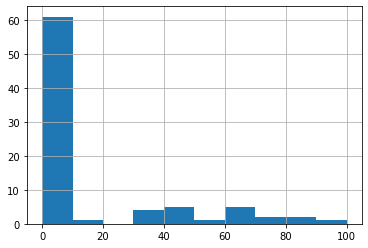

In [151]:
# ดู contact รวมทั้งหมดของทั้ง 82 คน (เพื่อเทียบสัดส่วนกับ การติดต่อกับคนทุจริต)
table2 = pd.pivot_table(inspect_id_all, values='Contact ID',index='Inspect ID', columns='Type', aggfunc='count')
table2.fillna(0, inplace=True)
table2['Total contact'] = table2['Call']+table2['Email']+table2['Meeting']+table2['Purchase']

intial_suspicious_table = intial_suspicious_table.sort_index()
table3 = pd.concat([intial_suspicious_table, table2], axis=1)

table3['%S_Call'] = (table3['S_Call']/table3['Call'])*100
table3['%S_Email'] = (table3['S_Email']/table3['Email'])*100
table3['%S_Meeting'] = (table3['S_Meeting']/table3['Meeting'])*100
table3['%S_Purchase'] = (table3['S_Purchase']/table3['Purchase'])*100
table3['%S_contact'] = (table3['Total suspicious contact']/table3['Total contact'])*100
table3.fillna(0, inplace=True)
table3 = table3.sort_values('%S_contact',ascending=False)
table3

print("Maximum % with suspicious contact ",table3['%S_contact'].max())
print("Minimum % with suspicious contact ",table3['%S_contact'].min())
print("Median % with suspicious contact ",table3['%S_contact'].median())
print("Average % with suspicious contact ",table3['%S_contact'].mean())
print("SD with suspicious contact ",table3['%S_contact'].std())
table3['%S_contact'].hist()

In [152]:
#suspicious_table = table3[table3['%S_contact'] >= table3['%S_contact'].median()]

suspicious_table = table3
suspicious_table['ID'] = suspicious_table.index.values
suspicious_table = suspicious_table.merge(com_index, left_on='ID', right_on='ID')
suspicious_table = suspicious_table.reindex(columns=['ID','first','last','Total suspicious contact','Total contact','%S_contact','Purchase','S_Purchase','%S_Purchase','Meeting','S_Meeting','%S_Meeting','Email','S_Email','%S_Email','Call','S_Call','%S_Call'])
dfi.export(suspicious_table,"mytable.png")
suspicious_table

,ID,first,last,Total suspicious contact,Total contact,%S_contact,Purchase,S_Purchase,%S_Purchase,Meeting,S_Meeting,%S_Meeting,Email,S_Email,%S_Email,Call,S_Call,%S_Call
0,2038003,Jenice,Savaria,2.0,2.0,100.000000,1.0,1.0,100.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,100.000000
1,175354,Madeline,Nindorf,16.0,19.0,84.210526,0.0,0.0,0.0,4.0,3.0,75.0,0.0,0.0,0.000000,15.0,13.0,86.666667
2,1847246,Rosalia,Larroque,37.0,45.0,82.222222,1.0,1.0,100.0,1.0,1.0,100.0,18.0,12.0,66.666667,25.0,23.0,92.000000
3,696047,Jose,Ringwald,18.0,24.0,75.000000,0.0,0.0,0.0,0.0,0.0,0.0,13.0,11.0,84.615385,11.0,7.0,63.636364
4,387200,Augusta,Sharp,14.0,19.0,73.684211,0.0,0.0,0.0,0.0,0.0,0.0,10.0,6.0,60.000000,9.0,8.0,88.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,713474,Sachiko,Sanabria,3.0,127660.0,0.002350,1857.0,0.0,0.0,0.0,0.0,0.0,73195.0,0.0,0.000000,52608.0,3.0,0.005703
78,713701,Jane,Tyler,7.0,320927.0,0.002181,4740.0,0.0,0.0,0.0,0.0,0.0,184030.0,4.0,0.002174,132157.0,3.0,0.002270
79,713468,Herman,Todd,2.0,93947.0,0.002129,1372.0,0.0,0.0,0.0,0.0,0.0,53914.0,2.0,0.003710,38661.0,0.0,0.000000
80,292073,Wilhelmina,Nybo,2.0,113021.0,0.001770,1689.0,0.0,0.0,0.0,0.0,0.0,64752.0,2.0,0.003089,46580.0,0.0,0.000000


In [153]:
## ได้ผู้ต้องสงสัย 82 คนจากการวิเคราะห์เบื้องต้นด้วย pivot table โดยไม่คำนึงถึงเรื่องเวลา

# Graph analysis

# ตรวจสอบการติดต่อทั้งหมดของคนที่ทุจริต 20 คน

In [154]:
suspicious_people = suspicious['Suspicious ID'].tolist()
all_df = pd.concat([purchase, meeting, email, call])
all_df

,ID 1,Suspicious_type,ID 2,Index
0,713639,2,2040565,1970-01-01 01:11:48
1,713474,2,2040565,1970-01-01 01:25:34
2,713701,2,2040565,1970-01-01 01:25:49
3,1376868,2,2040565,1970-01-01 01:27:33
4,713468,2,2040565,1970-01-01 01:34:29
...,...,...,...,...
10606830,690101,0,713725,1972-08-22 08:25:49
10606831,691065,0,691961,1972-08-22 08:25:54
10606832,730947,0,684386,1972-08-22 08:25:54
10606833,726173,0,691065,1972-08-22 08:25:57


# ตรวจสอบการติดต่อทั้งหมด โดยไม่คำนึงถึงเวลา

period all time
Contacts with suspicious people 1100
Related people  885
All combinations  958
Average degree  2.1649717514124296


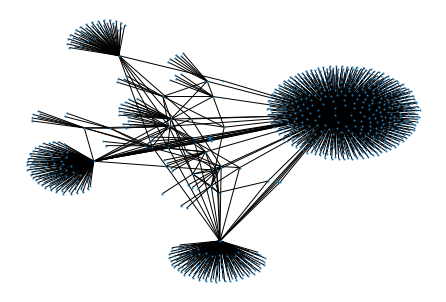

In [155]:
contact_with_sus_all1 = []
for i in range(len(suspicious_people)):
    if suspicious_people[i] in all_df['ID 1'].tolist():
        all_df_data = all_df[all_df['ID 1'] == suspicious_people[i]]
        for index in range(len(all_df_data)):
            suspicious_contact = set([all_df_data.iloc[index,0], all_df_data.iloc[index,2]])
            suspicious_contact_time = all_df_data.iloc[index,3]
            contact_with_sus_all1.append([suspicious_contact,suspicious_contact_time])
            
    elif suspicious_people[i] in all_df['ID 2'].tolist():
        all_df_data = all_df[all_df['ID 2'] == suspicious_people[i]]
        for index in range(len(all_df_data)):
            suspicious_contact = set([all_df_data.iloc[index,0], all_df_data.iloc[index,2]])
            suspicious_contact_time = all_df_data.iloc[index,3]
            contact_with_sus_all1.append([suspicious_contact,suspicious_contact_time])    
            
contact_with_sus_all = []

for i in contact_with_sus_all1:
    if i not in contact_with_sus_all:
        contact_with_sus_all.append(i)
        
contact_with_sus_all

## nodes all for sus all

sus_nodes_a = {}
sus_edges_a = {}

for index in range(len(contact_with_sus_all)):
    pair, time = contact_with_sus_all[index]
    pair = tuple(pair)
    reversed_pair = pair[1],pair[0]

    #nodes
    for idn in pair:
        if idn in sus_nodes_a:
            sus_nodes_a[idn] += 1
        else:
            sus_nodes_a[idn] = 1
    #edges
    if pair in sus_edges_a:
        sus_edges_a[pair] += 1
    elif reversed_pair in sus_edges_a:
        sus_edges_a[reversed_pair] += 1
    else:
        sus_edges_a[pair] = 1
        
#calculate the average degree; each edge has two nodes i.e. adding two degrees
sus_avg_degree_a = (2*len(sus_edges_a)/len(sus_nodes_a) if len(sus_nodes_a) > 0 else 0)

print("period all time")
print("Contacts with suspicious people",len(contact_with_sus_all))
print("Related people ",len(sus_nodes_a))
print("All combinations ",len(sus_edges_a))
print("Average degree ",sus_avg_degree_a)

sus_nodes_a = dict(sorted(sus_nodes_a.items(), key=lambda item: item[1], reverse=True))
sus_edges_a = dict(sorted(sus_edges_a.items(), key=lambda item: item[1], reverse=True))

graphx = nx.Graph()
graphx.add_nodes_from(sus_nodes_a)
graphx.add_edges_from(sus_edges_a)
nx.draw(graphx, node_size=1)

In [156]:
all_no_time = {}
for i in sus_nodes_a.items():
    if i[1] > 1:
        all_no_time[i[0]] = i[1]
        
print("ผู้ต้องสงสัยที่มี nodes มากกว่า 1 จำนวน {} คน ".format(len(all_no_time)))
print("(ID, nodes) >>> ",all_no_time.items())

ผู้ต้องสงสัยที่มี nodes มากกว่า 1 จำนวน 50 คน 
(ID, nodes) >>>  dict_items([(857138, 599), (969089, 142), (1690582, 140), (623027, 54), (728286, 46), (1108217, 41), (1847246, 38), (1642962, 26), (2040565, 24), (696047, 20), (1039322, 18), (981554, 17), (1886447, 17), (387200, 16), (387676, 15), (1023940, 15), (786361, 12), (1663285, 12), (28520, 11), (234164, 10), (944354, 8), (51780, 8), (175354, 7), (713701, 6), (2037156, 6), (505444, 5), (1376868, 4), (713876, 3), (713743, 3), (2038003, 2), (713489, 2), (714191, 2), (713020, 2), (712620, 2), (714853, 2), (711648, 2), (716478, 2), (721312, 2), (713336, 2), (714016, 2), (713410, 2), (715373, 2), (1963161, 2), (1981017, 2), (713979, 2), (713767, 2), (713639, 2), (712810, 2), (713814, 2), (713444, 2)])


# ตรวจสอบการติดต่อทั้งหมด ในช่วงเวลา 30 วัน ของ 20 คนที่ทุจริต

In [157]:
suspicious_contact_all = []

for index in range(len(sus_all)):
    suspicious_contact = set([sus_all.iloc[index,0], sus_all.iloc[index,2]])
    suspicious_contact_time = sus_all.iloc[index,3]
    suspicious_contact_all.append([suspicious_contact,suspicious_contact_time])

period 30 days
Contacts with suspicious people 938
Related people  749
All combinations  817
Average degree  2.1815754339118825


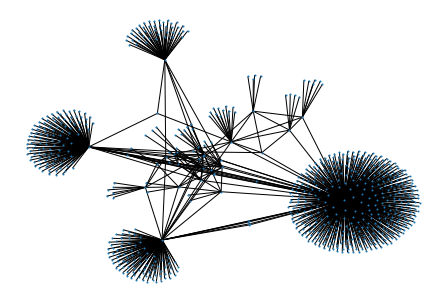

In [158]:
peroid_day = 30

freq_contact_with_sus_all_1m = []

for index in range(len(contact_with_sus_all)):
    pair, time = contact_with_sus_all[index]
    for i in suspicious_contact_all: #+-1 เดือนของ sus contact ทั้งหมด
        time2 = i[1]
        if abs(time - time2).days <= peroid_day:
            freq_contact_with_sus_all_1m.append([pair,time])
            
            
contact_with_sus_all_1m = []

for i in freq_contact_with_sus_all_1m:
    if i not in contact_with_sus_all_1m:
        contact_with_sus_all_1m.append(i)
        
contact_with_sus_all_1m

## nodes all for sus call 1m
sus_nodes_1m_a = {}
sus_edges_1m_a = {}

for index in range(len(contact_with_sus_all_1m)):
    pair, time = contact_with_sus_all_1m[index]
    pair = tuple(pair)
    reversed_pair = pair[1],pair[0]

    #nodes
    for idn in pair:
        if idn in sus_nodes_1m_a:
            sus_nodes_1m_a[idn] += 1
        else:
            sus_nodes_1m_a[idn] = 1
    #edges
    if pair in sus_edges_1m_a:
        sus_edges_1m_a[pair] += 1
    elif reversed_pair in sus_edges_1m_a:
        sus_edges_1m_a[reversed_pair] += 1
    else:
        sus_edges_1m_a[pair] = 1
        
#calculate the average degree; each edge has two nodes i.e. adding two degrees
sus_avg_degree_1m_a = (2*len(sus_edges_1m_a)/len(sus_nodes_1m_a) if len(sus_nodes_1m_a) > 0 else 0)

print("period {} days".format(peroid_day))
print("Contacts with suspicious people",len(contact_with_sus_all_1m))
print("Related people ",len(sus_nodes_1m_a))
print("All combinations ",len(sus_edges_1m_a))
print("Average degree ",sus_avg_degree_1m_a)

sus_nodes_1m_a = dict(sorted(sus_nodes_1m_a.items(), key=lambda item: item[1], reverse=True))
sus_edges_1m_a = dict(sorted(sus_edges_1m_a.items(), key=lambda item: item[1], reverse=True))

graphx = nx.Graph()
graphx.add_nodes_from(sus_nodes_1m_a)
graphx.add_edges_from(sus_edges_1m_a)
nx.draw(graphx, node_size=1)

In [159]:
all_time = {}
for i in sus_nodes_1m_a.items():
    if i[1] > 1:
        all_time[i[0]] = i[1]
        
print("ผู้ต้องสงสัยที่มี nodes มากกว่า 1 จำนวน {} คน ".format(len(all_time)))
print("(ID, nodes) >>> ",all_time.items())

ผู้ต้องสงสัยที่มี nodes มากกว่า 1 จำนวน 38 คน 
(ID, nodes) >>>  dict_items([(857138, 462), (969089, 135), (1690582, 125), (623027, 52), (728286, 46), (1108217, 40), (1847246, 38), (1642962, 26), (696047, 20), (1039322, 18), (2040565, 17), (981554, 17), (1886447, 17), (387200, 16), (387676, 15), (1023940, 15), (786361, 12), (1663285, 12), (28520, 11), (234164, 10), (944354, 8), (51780, 8), (175354, 7), (2037156, 6), (505444, 5), (713743, 3), (2038003, 2), (721312, 2), (1376868, 2), (713701, 2), (713336, 2), (714016, 2), (713410, 2), (715373, 2), (713639, 2), (712810, 2), (713814, 2), (713444, 2)])


In [160]:
new_guys = []
old_guys = []
for i in all_time.keys():
    if i in suspicious['Suspicious ID'].tolist():
        old_guys.append(i)
    else:
        new_guys.append(i)
        
old_guys
new_guys
new_guys_df = pd.DataFrame(new_guys, columns=['ID']).merge(suspicious_table, on='ID')
dfi.export(new_guys_df,"mytable2.png")
new_guys_df #df นี้จะไม่คำนึงถึงช่วงเวลา        

,ID,first,last,Total suspicious contact,Total contact,%S_contact,Purchase,S_Purchase,%S_Purchase,Meeting,S_Meeting,%S_Meeting,Email,S_Email,%S_Email,Call,S_Call,%S_Call
0,2040565,Gail,Feindt,24.0,745027.0,0.003221,745027.0,24.0,0.003221,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1,981554,Sherrell,Biebel,30.0,50.0,60.000000,0.0,0.0,0.000000,5.0,4.0,80.0,21.0,11.0,52.380952,24.0,15.0,62.500000
2,786361,Sheilah,Stachniw,21.0,106.0,19.811321,4.0,0.0,0.000000,0.0,0.0,0.0,56.0,14.0,25.000000,46.0,7.0,15.217391
3,944354,Ferne,Hards,13.0,26.0,50.000000,0.0,0.0,0.000000,0.0,0.0,0.0,16.0,9.0,56.250000,10.0,4.0,40.000000
4,175354,Madeline,Nindorf,16.0,19.0,84.210526,0.0,0.0,0.000000,4.0,3.0,75.0,0.0,0.0,0.000000,15.0,13.0,86.666667
5,2037156,Martha,Harris,11.0,16.0,68.750000,0.0,0.0,0.000000,0.0,0.0,0.0,8.0,6.0,75.000000,8.0,5.0,62.500000
6,713743,Sherilyn,Coopwood,3.0,75781.0,0.003959,1081.0,0.0,0.000000,0.0,0.0,0.0,43630.0,0.0,0.000000,31070.0,3.0,0.009656
7,721312,Alethia,Halmick,2.0,1218.0,0.164204,21.0,0.0,0.000000,0.0,0.0,0.0,690.0,2.0,0.289855,507.0,0.0,0.000000
8,1376868,Timothy,Gibson,7.0,220777.0,0.003171,3317.0,0.0,0.000000,0.0,0.0,0.0,126173.0,3.0,0.002378,91287.0,4.0,0.004382
9,713701,Jane,Tyler,7.0,320927.0,0.002181,4740.0,0.0,0.000000,0.0,0.0,0.0,184030.0,4.0,0.002174,132157.0,3.0,0.002270


# ลองตรวจสอบแยกในการติดต่อแต่ละประเภท

# Purchase

In [161]:
## all contact

purchase_contact_all = []

for index in range(len(purchase)): #ส่วนนี้ละได้ แล้วใช้ df ไปเลยตอน run หา nodes
    purchase_contact = set([purchase.iloc[index,0], purchase.iloc[index,2]])
    purchase_contact_time = purchase.iloc[index,3]
    purchase_contact_all.append([purchase_contact,purchase_contact_time])
    
purchase_contact_all

###
## nodes all for purchase
nodes_p = {}
edges_p = {}
for index in range(len(purchase_contact_all)):
    pair, time = purchase_contact_all[index]
    pair = tuple(pair)
    reversed_pair = pair[1],pair[0]

    #nodes
    for idn in pair:
        if idn in nodes_p:
            nodes_p[idn] += 1
        else:
            nodes_p[idn] = 1
    #edges
    if pair in edges_p:
        edges_p[pair] += 1
    elif reversed_pair in edges_p:
        edges_p[reversed_pair] += 1
    else:
        edges_p[pair] = 1
        
#calculate the average degree; each edge has two nodes i.e. adding two degrees
avg_degree_p = (2*len(edges_p)/len(nodes_p) if len(nodes_p) > 0 else 0)

print("All Time")
print("Contacts with suspicious people",len(purchase_contact_all))
print("Related people ",len(nodes_p))
print("All combinations ",len(edges_p))
print("Average degree ",avg_degree_p)

nodes_p = dict(sorted(nodes_p.items(), key=lambda item: item[1], reverse=True))
edges_p = dict(sorted(edges_p.items(), key=lambda item: item[1], reverse=True))

## run นาน ไม่ต้อง run 
#graphx = nx.Graph()
#graphx.add_nodes_from(nodes_p)
#graphx.add_edges_from(edges_p)
#nx.draw(graphx, node_size=1)

All Time
Contacts with suspicious people 762200
Related people  227382
All combinations  240266
Average degree  2.11332471347776


Purchase
All Time suspicious
Contacts with suspicious people 25
Related people  7
All combinations  5
Average degree  1.4285714285714286


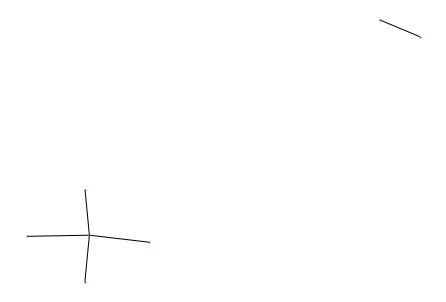

In [162]:
# all sus contact

contact_with_sus_pur1 = []

for i in range(len(suspicious_people)):
    if suspicious_people[i] in purchase['ID 1'].tolist():
        pur_data = purchase[purchase['ID 1'] == suspicious_people[i]]
        for index in range(len(pur_data)):
            suspicious_contact = set([pur_data.iloc[index,0], pur_data.iloc[index,2]])
            suspicious_contact_time = pur_data.iloc[index,3]
            contact_with_sus_pur1.append([suspicious_contact,suspicious_contact_time])
            
    elif suspicious_people[i] in purchase['ID 2'].tolist():
        pur_data = purchase[purchase['ID 2'] == suspicious_people[i]]
        for index in range(len(pur_data)):
            suspicious_contact = set([pur_data.iloc[index,0], pur_data.iloc[index,2]])
            suspicious_contact_time = pur_data.iloc[index,3]
            contact_with_sus_pur1.append([suspicious_contact,suspicious_contact_time])    
            
contact_with_sus_pur = []

###
for i in contact_with_sus_pur1:
    if i not in contact_with_sus_pur:
        contact_with_sus_pur.append(i)
        
## nodes all for sus purchase
sus_nodes_p = {}
sus_edges_p = {}
for index in range(len(contact_with_sus_pur)):
    pair, time = contact_with_sus_pur[index]
    pair = tuple(pair)
    reversed_pair = pair[1],pair[0]

    #nodes
    for idn in pair:
        if idn in sus_nodes_p:
            sus_nodes_p[idn] += 1
        else:
            sus_nodes_p[idn] = 1
    #edges
    if pair in sus_edges_p:
        sus_edges_p[pair] += 1
    elif reversed_pair in sus_edges_p:
        sus_edges_p[reversed_pair] += 1
    else:
        sus_edges_p[pair] = 1
        
#calculate the average degree; each edge has two nodes i.e. adding two degrees
sus_avg_degree_p = (2*len(sus_edges_p)/len(sus_nodes_p) if len(sus_nodes_p) > 0 else 0)

print("Purchase")
print("All Time suspicious")
print("Contacts with suspicious people",len(contact_with_sus_pur))
print("Related people ",len(sus_nodes_p))
print("All combinations ",len(sus_edges_p))
print("Average degree ",sus_avg_degree_p)

sus_nodes_p = dict(sorted(sus_nodes_p.items(), key=lambda item: item[1], reverse=True))
sus_edges_p = dict(sorted(sus_edges_p.items(), key=lambda item: item[1], reverse=True))

graphx = nx.Graph()
graphx.add_nodes_from(sus_nodes_p)
graphx.add_edges_from(sus_edges_p)
nx.draw(graphx, node_size=1)


Purchase
period 30 days
Contacts with suspicious people 18
Related people  7
All combinations  5
Average degree  1.4285714285714286


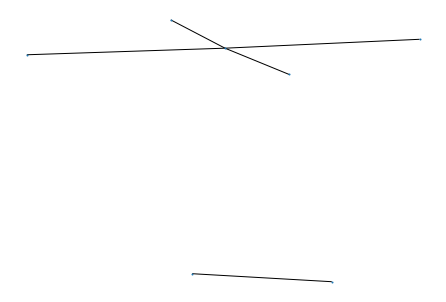

In [163]:
peroid_day = 30

freq_contact_with_sus_pur_1m = []

for index in range(len(contact_with_sus_pur)):
    pair, time = contact_with_sus_pur[index]
    for i in suspicious_contact_all: #+-1 เดือนของ sus contact ทั้งหมด
        time2 = i[1]
        if abs(time - time2).days <= peroid_day:
            freq_contact_with_sus_pur_1m.append([pair,time])
            
            
contact_with_sus_pur_1m = []

for i in freq_contact_with_sus_pur_1m:
    if i not in contact_with_sus_pur_1m:
        contact_with_sus_pur_1m.append(i)
        
###
## nodes all for sus purchase 1m
sus_nodes_1m_p = {}
sus_edges_1m_p = {}
for index in range(len(contact_with_sus_pur_1m)):
    pair, time = contact_with_sus_pur_1m[index]
    pair = tuple(pair)
    reversed_pair = pair[1],pair[0]

    #nodes
    for idn in pair:
        if idn in sus_nodes_1m_p:
            sus_nodes_1m_p[idn] += 1
        else:
            sus_nodes_1m_p[idn] = 1
    #edges
    if pair in sus_edges_1m_p:
        sus_edges_1m_p[pair] += 1
    elif reversed_pair in sus_edges_1m_p:
        sus_edges_1m_p[reversed_pair] += 1
    else:
        sus_edges_1m_p[pair] = 1
        
#calculate the average degree; each edge has two nodes i.e. adding two degrees
sus_avg_degree_1m_p = (2*len(sus_edges_1m_p)/len(sus_nodes_1m_p) if len(sus_nodes_1m_p) > 0 else 0)

print("Purchase")
print("period {} days".format(peroid_day))
print("Contacts with suspicious people",len(contact_with_sus_pur_1m))
print("Related people ",len(sus_nodes_1m_p))
print("All combinations ",len(sus_edges_1m_p))
print("Average degree ",sus_avg_degree_1m_p)

sus_nodes_1m_p = dict(sorted(sus_nodes_1m_p.items(), key=lambda item: item[1], reverse=True))
sus_edges_1m_p = dict(sorted(sus_edges_1m_p.items(), key=lambda item: item[1], reverse=True))

graphx = nx.Graph()
graphx.add_nodes_from(sus_nodes_1m_p)
graphx.add_edges_from(sus_edges_1m_p)
nx.draw(graphx, node_size=1)

# Meeting

In [164]:
# all contact
meeting_contact_all = []

for index in range(len(meeting)):
    meeting_contact = set([meeting.iloc[index,0], meeting.iloc[index,2]])
    meeting_contact_time = meeting.iloc[index,3]
    meeting_contact_all.append([meeting_contact,meeting_contact_time])
    

## nodes all for meeting
nodes_m = {}
edges_m = {}
for index in range(len(meeting_contact_all)):
    pair, time = meeting_contact_all[index]
    pair = tuple(pair)
    reversed_pair = pair[1],pair[0]

    #nodes
    for idn in pair:
        if idn in nodes_m:
            nodes_m[idn] += 1
        else:
            nodes_m[idn] = 1
    #edges
    if pair in edges_m:
        edges_m[pair] += 1
    elif reversed_pair in edges_m:
        edges_m[reversed_pair] += 1
    else:
        edges_m[pair] = 1
        
#calculate the average degree; each edge has two nodes i.e. adding two degrees
avg_degree_m = (2*len(edges_m)/len(nodes_m) if len(nodes_m) > 0 else 0)

print("Meeting")
print("All Time")
print("Contacts with suspicious people",len(meeting_contact_all))
print("Related people ",len(nodes_m))
print("All combinations ",len(edges_m))
print("Average degree ",avg_degree_m)

nodes_m = dict(sorted(nodes_p.items(), key=lambda item: item[1], reverse=True))
edges_m = dict(sorted(edges_p.items(), key=lambda item: item[1], reverse=True))

## run นาน ไม่ต้อง run 
#graphx = nx.Graph()
#graphx.add_nodes_from(nodes_p)
#graphx.add_edges_from(edges_p)
#nx.draw(graphx, node_size=1)

Meeting
All Time
Contacts with suspicious people 127351
Related people  101471
All combinations  127349
Average degree  2.510057060638015


Meeting
All Time suspicious
Contacts with suspicious people 16
Related people  13
All combinations  14
Average degree  2.1538461538461537


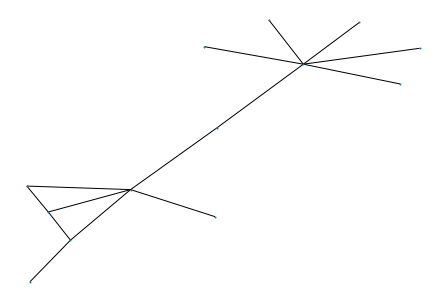

In [165]:
# sus contact
contact_with_sus_meeting1 = []

for i in range(len(suspicious_people)):
    if suspicious_people[i] in meeting['ID 1'].tolist():
        meeting_data = meeting[meeting['ID 1'] == suspicious_people[i]]
        for index in range(len(meeting_data)):
            suspicious_contact = set([meeting_data.iloc[index,0], meeting_data.iloc[index,2]])
            suspicious_contact_time = meeting_data.iloc[index,3]
            contact_with_sus_meeting1.append([suspicious_contact,suspicious_contact_time])
            
    elif suspicious_people[i] in meeting['ID 2'].tolist():
        meeting_data = meeting[meeting['ID 2'] == suspicious_people[i]]
        for index in range(len(meeting_data)):
            suspicious_contact = set([meeting_data.iloc[index,0], meeting_data.iloc[index,2]])
            suspicious_contact_time = meeting_data.iloc[index,3]
            contact_with_sus_meeting1.append([suspicious_contact,suspicious_contact_time])    
            
contact_with_sus_meeting = []

for i in contact_with_sus_meeting1:
    if i not in contact_with_sus_meeting:
        contact_with_sus_meeting.append(i)
        

## nodes all for sus meeting
sus_nodes_m = {}
sus_edges_m = {}
for index in range(len(contact_with_sus_meeting)):
    pair, time = contact_with_sus_meeting[index]
    pair = tuple(pair)
    reversed_pair = pair[1],pair[0]

    #nodes
    for idn in pair:
        if idn in sus_nodes_m:
            sus_nodes_m[idn] += 1
        else:
            sus_nodes_m[idn] = 1
    #edges
    if pair in sus_edges_m:
        sus_edges_m[pair] += 1
    elif reversed_pair in sus_edges_m:
        sus_edges_m[reversed_pair] += 1
    else:
        sus_edges_m[pair] = 1
        
#calculate the average degree; each edge has two nodes i.e. adding two degrees
sus_avg_degree_m = (2*len(sus_edges_m)/len(sus_nodes_m) if len(sus_nodes_m) > 0 else 0)

print("Meeting")
print("All Time suspicious")
print("Contacts with suspicious people",len(contact_with_sus_meeting))
print("Related people ",len(sus_nodes_m))
print("All combinations ",len(sus_edges_m))
print("Average degree ",sus_avg_degree_m)

sus_nodes_m = dict(sorted(sus_nodes_m.items(), key=lambda item: item[1], reverse=True))
sus_edges_m = dict(sorted(sus_edges_m.items(), key=lambda item: item[1], reverse=True))

graphx = nx.Graph()
graphx.add_nodes_from(sus_nodes_m)
graphx.add_edges_from(sus_edges_m)
nx.draw(graphx, node_size=1)

#กราฟเหมือนมีคนเชื่อมกลุ่มทุจริตเข้าด้วยกัน 1 คน

Meeting
period 30 days
Contacts with suspicious people 15
Related people  12
All combinations  13
Average degree  2.1666666666666665


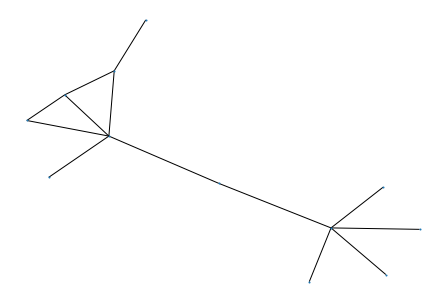

In [166]:
# sus contact 1m
period_days = 30

freq_contact_with_sus_meeting_1m = []

for index in range(len(contact_with_sus_meeting)):
    pair, time = contact_with_sus_meeting[index]
    for i in suspicious_contact_all: #+-1 เดือนของ sus contact ทั้งหมด
        time2 = i[1]
        if abs(time - time2).days <= period_days:
            freq_contact_with_sus_meeting_1m.append([pair,time])
            
            
contact_with_sus_meeting_1m = []

for i in freq_contact_with_sus_meeting_1m:
    if i not in contact_with_sus_meeting_1m:
        contact_with_sus_meeting_1m.append(i)
        
## nodes all for sus meeting 1m
sus_nodes_1m_m = {}
sus_edges_1m_m = {}
for index in range(len(contact_with_sus_meeting_1m)):
    pair, time = contact_with_sus_meeting_1m[index]
    pair = tuple(pair)
    reversed_pair = pair[1],pair[0]

    #nodes
    for idn in pair:
        if idn in sus_nodes_1m_m:
            sus_nodes_1m_m[idn] += 1
        else:
            sus_nodes_1m_m[idn] = 1
    #edges
    if pair in sus_edges_1m_m:
        sus_edges_1m_m[pair] += 1
    elif reversed_pair in sus_edges_1m_m:
        sus_edges_1m_m[reversed_pair] += 1
    else:
        sus_edges_1m_m[pair] = 1
        
#calculate the average degree; each edge has two nodes i.e. adding two degrees
sus_avg_degree_1m_m = (2*len(sus_edges_1m_m)/len(sus_nodes_1m_m) if len(sus_nodes_1m_m) > 0 else 0)

print("Meeting")
print("period {} days".format(peroid_day))
print("Contacts with suspicious people",len(contact_with_sus_meeting_1m))
print("Related people ",len(sus_nodes_1m_m))
print("All combinations ",len(sus_edges_1m_m))
print("Average degree ",sus_avg_degree_1m_m)

sus_nodes_1m_m = dict(sorted(sus_nodes_1m_m.items(), key=lambda item: item[1], reverse=True))
sus_edges_1m_m = dict(sorted(sus_edges_1m_m.items(), key=lambda item: item[1], reverse=True))

graphx = nx.Graph()
graphx.add_nodes_from(sus_nodes_1m_m)
graphx.add_edges_from(sus_edges_1m_m)
nx.draw(graphx, node_size=1)

#กราฟเหมือนมีคนเชื่อมกลุ่มทุจริตเข้าด้วยกัน 1 คน

# Emails

In [167]:
#contact all run นาน ให้ถือว่า run ไม่ออก

#email_contact_all = []

#for index in range(len(email)):
#    email_contact = set([email.iloc[index,0], email.iloc[index,2]])
#    email_contact_time = email.iloc[index,3]
#    email_contact_all.append([email_contact,email_contact_time])
    
#email_contact_all

#nodes_m = {}
#edges_m = {}
#for index in range(len(email_contact_all)):
#    pair, time = email_contact_all[index]
#    pair = tuple(pair)
#    reversed_pair = pair[1],pair[0]

    #nodes
#    for idn in pair:
#        if idn in nodes_m:
#            nodes_m[idn] += 1
#        else:
#            nodes_m[idn] = 1
    #edges
#    if pair in edges_m:
#        edges_m[pair] += 1
#    elif reversed_pair in edges_m:
#        edges_m[reversed_pair] += 1
#    else:
#        edges_m[pair] = 1
        
#calculate the average degree; each edge has two nodes i.e. adding two degrees
#print(2*len(edges_m)/len(nodes_m) if len(nodes_m) > 0 else 0)

Email
All Time suspicious
Contacts with suspicious people 589
Related people  521
All combinations  552
Average degree  2.1190019193857967


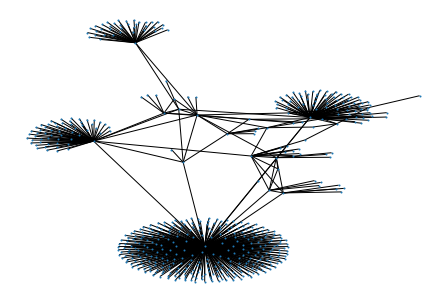

In [168]:
# sus contact

contact_with_sus_email1 = []

for i in range(len(suspicious_people)):
    if suspicious_people[i] in email['ID 1'].tolist():
        email_data = email[email['ID 1'] == suspicious_people[i]]
        for index in range(len(email_data)):
            suspicious_contact = set([email_data.iloc[index,0], email_data.iloc[index,2]])
            suspicious_contact_time = email_data.iloc[index,3]
            contact_with_sus_email1.append([suspicious_contact,suspicious_contact_time])
            
    elif suspicious_people[i] in email['ID 2'].tolist():
        email_data = email[email['ID 2'] == suspicious_people[i]]
        for index in range(len(email_data)):
            suspicious_contact = set([email_data.iloc[index,0], email_data.iloc[index,2]])
            suspicious_contact_time = email_data.iloc[index,3]
            contact_with_sus_email1.append([suspicious_contact,suspicious_contact_time])    
            
contact_with_sus_email = []

for i in contact_with_sus_email1:
    if i not in contact_with_sus_email:
        contact_with_sus_email.append(i)
        
## nodes all for sus email

sus_nodes_e = {}
sus_edges_e = {}

for index in range(len(contact_with_sus_email)):
    pair, time = contact_with_sus_email[index]
    pair = tuple(pair)
    reversed_pair = pair[1],pair[0]

    #nodes
    for idn in pair:
        if idn in sus_nodes_e:
            sus_nodes_e[idn] += 1
        else:
            sus_nodes_e[idn] = 1
    #edges
    if pair in sus_edges_e:
        sus_edges_e[pair] += 1
    elif reversed_pair in sus_edges_e:
        sus_edges_e[reversed_pair] += 1
    else:
        sus_edges_e[pair] = 1
        
#calculate the average degree; each edge has two nodes i.e. adding two degrees
sus_avg_degree_e = (2*len(sus_edges_e)/len(sus_nodes_e) if len(sus_nodes_e) > 0 else 0)

print("Email")
print("All Time suspicious")
print("Contacts with suspicious people",len(contact_with_sus_email))
print("Related people ",len(sus_nodes_e))
print("All combinations ",len(sus_edges_e))
print("Average degree ",sus_avg_degree_e)

sus_nodes_e = dict(sorted(sus_nodes_e.items(), key=lambda item: item[1], reverse=True))
sus_edges_e = dict(sorted(sus_edges_e.items(), key=lambda item: item[1], reverse=True))

graphx = nx.Graph()
graphx.add_nodes_from(sus_nodes_e)
graphx.add_edges_from(sus_edges_e)
nx.draw(graphx, node_size=1)


Email
period 30 days
Contacts with suspicious people 509
Related people  448
All combinations  478
Average degree  2.1339285714285716


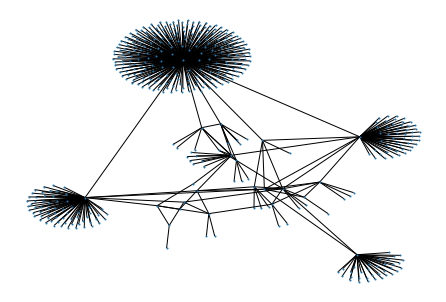

In [169]:
# sus contact 1 m

peroid_day = 30
freq_contact_with_sus_email_1m = []

for index in range(len(contact_with_sus_email)):
    pair, time = contact_with_sus_email[index]
    for i in suspicious_contact_all: #+-1 เดือนของ sus contact ทั้งหมด
        time2 = i[1]
        if abs(time - time2).days <= peroid_day:
            freq_contact_with_sus_email_1m.append([pair,time])
            
            
contact_with_sus_email_1m = []

for i in freq_contact_with_sus_email_1m:
    if i not in contact_with_sus_email_1m:
        contact_with_sus_email_1m.append(i)
        
## nodes all for sus email 1m
sus_nodes_1m_e = {}
sus_edges_1m_e = {}

for index in range(len(contact_with_sus_email_1m)):
    pair, time = contact_with_sus_email_1m[index]
    pair = tuple(pair)
    reversed_pair = pair[1],pair[0]

    #nodes
    for idn in pair:
        if idn in sus_nodes_1m_e:
            sus_nodes_1m_e[idn] += 1
        else:
            sus_nodes_1m_e[idn] = 1
    #edges
    if pair in sus_edges_1m_e:
        sus_edges_1m_e[pair] += 1
    elif reversed_pair in sus_edges_1m_e:
        sus_edges_1m_e[reversed_pair] += 1
    else:
        sus_edges_1m_e[pair] = 1
        
#calculate the average degree; each edge has two nodes i.e. adding two degrees
sus_avg_degree_1m_e = (2*len(sus_edges_1m_e)/len(sus_nodes_1m_e) if len(sus_nodes_1m_e) > 0 else 0)

print("Email")
print("period {} days".format(peroid_day))
print("Contacts with suspicious people",len(contact_with_sus_email_1m))
print("Related people ",len(sus_nodes_1m_e))
print("All combinations ",len(sus_edges_1m_e))
print("Average degree ",sus_avg_degree_1m_e)

sus_nodes_1m_e = dict(sorted(sus_nodes_1m_e.items(), key=lambda item: item[1], reverse=True))
sus_edges_1m_e = dict(sorted(sus_edges_1m_e.items(), key=lambda item: item[1], reverse=True))

graphx = nx.Graph()
graphx.add_nodes_from(sus_nodes_1m_e)
graphx.add_edges_from(sus_edges_1m_e)
nx.draw(graphx, node_size=1)



# Calls

In [170]:
# all contact ### run นาน 

#call_contact_all = []

#for index in range(len(call)):
#    call_contact = set([call.iloc[index,0], call.iloc[index,2]])
#    call_contact_time = call.iloc[index,3]
#    call_contact_all.append([call_contact,call_contact_time])
    
#meeting_contact_all

## call_contact_all run นาน อันนี้เลย run ต่อไม่ได้ nodes all for meeting
#nodes_m = {}
#edges_m = {}
#for index in range(len(call_contact_all)):
#    pair, time = call_contact_all[index]
#    pair = tuple(pair)
#    reversed_pair = pair[1],pair[0]

    #nodes
#    for idn in pair:
#        if idn in nodes_m:
#            nodes_m[idn] += 1
#        else:
#            nodes_m[idn] = 1
    #edges
#    if pair in edges_m:
#        edges_m[pair] += 1
#    elif reversed_pair in edges_m:
#        edges_m[reversed_pair] += 1
#    else:
#        edges_m[pair] = 1
        
#calculate the average degree; each edge has two nodes i.e. adding two degrees
#print(2*len(edges_m)/len(nodes_m) if len(nodes_m) > 0 else 0)

Call
All Time suspicious
Contacts with suspicious people 470
Related people  393
All combinations  423
Average degree  2.1526717557251906


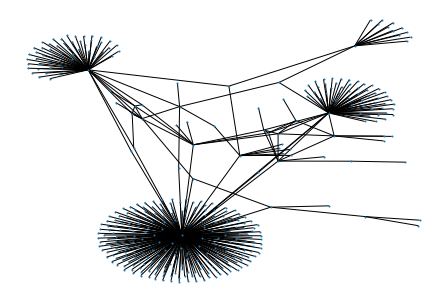

In [171]:
contact_with_sus_call1 = []

for i in range(len(suspicious_people)):
    if suspicious_people[i] in call['ID 1'].tolist():
        call_data = call[call['ID 1'] == suspicious_people[i]]
        for index in range(len(call_data)):
            suspicious_contact = set([call_data.iloc[index,0], call_data.iloc[index,2]])
            suspicious_contact_time = call_data.iloc[index,3]
            contact_with_sus_call1.append([suspicious_contact,suspicious_contact_time])
            
    elif suspicious_people[i] in call['ID 2'].tolist():
        call_data = call[call['ID 2'] == suspicious_people[i]]
        for index in range(len(call_data)):
            suspicious_contact = set([call_data.iloc[index,0], call_data.iloc[index,2]])
            suspicious_contact_time = call_data.iloc[index,3]
            contact_with_sus_call1.append([suspicious_contact,suspicious_contact_time])    
            
contact_with_sus_call = []

for i in contact_with_sus_call1:
    if i not in contact_with_sus_call:
        contact_with_sus_call.append(i)
        
contact_with_sus_call

## nodes all for sus call

sus_nodes_c = {}
sus_edges_c = {}

for index in range(len(contact_with_sus_call)):
    pair, time = contact_with_sus_call[index]
    pair = tuple(pair)
    reversed_pair = pair[1],pair[0]

    #nodes
    for idn in pair:
        if idn in sus_nodes_c:
            sus_nodes_c[idn] += 1
        else:
            sus_nodes_c[idn] = 1
    #edges
    if pair in sus_edges_c:
        sus_edges_c[pair] += 1
    elif reversed_pair in sus_edges_c:
        sus_edges_c[reversed_pair] += 1
    else:
        sus_edges_c[pair] = 1
        
#calculate the average degree; each edge has two nodes i.e. adding two degrees
sus_avg_degree_c = (2*len(sus_edges_c)/len(sus_nodes_c) if len(sus_nodes_c) > 0 else 0)

print("Call")
print("All Time suspicious")
print("Contacts with suspicious people",len(contact_with_sus_call))
print("Related people ",len(sus_nodes_c))
print("All combinations ",len(sus_edges_c))
print("Average degree ",sus_avg_degree_c)

sus_nodes_c = dict(sorted(sus_nodes_c.items(), key=lambda item: item[1], reverse=True))
sus_edges_c = dict(sorted(sus_edges_c.items(), key=lambda item: item[1], reverse=True))

graphx = nx.Graph()
graphx.add_nodes_from(sus_nodes_c)
graphx.add_edges_from(sus_edges_c)
nx.draw(graphx, node_size=1)

Call
period 30 days
Contacts with suspicious people 396
Related people  327
All combinations  353
Average degree  2.159021406727829


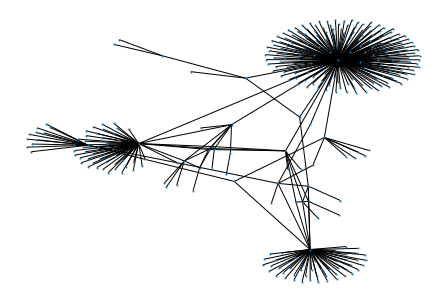

In [172]:
peroid_day = 30

freq_contact_with_sus_call_1m = []

for index in range(len(contact_with_sus_call)):
    pair, time = contact_with_sus_call[index]
    for i in suspicious_contact_all: #+-1 เดือนของ sus contact ทั้งหมด
        time2 = i[1]
        if abs(time - time2).days <= peroid_day:
            freq_contact_with_sus_call_1m.append([pair,time])
            
            
contact_with_sus_call_1m = []

for i in freq_contact_with_sus_call_1m:
    if i not in contact_with_sus_call_1m:
        contact_with_sus_call_1m.append(i)
        
## nodes all for sus call 1m
sus_nodes_1m_c = {}
sus_edges_1m_c = {}

for index in range(len(contact_with_sus_call_1m)):
    pair, time = contact_with_sus_call_1m[index]
    pair = tuple(pair)
    reversed_pair = pair[1],pair[0]

    #nodes
    for idn in pair:
        if idn in sus_nodes_1m_c:
            sus_nodes_1m_c[idn] += 1
        else:
            sus_nodes_1m_c[idn] = 1
    #edges
    if pair in sus_edges_1m_c:
        sus_edges_1m_c[pair] += 1
    elif reversed_pair in sus_edges_1m_c:
        sus_edges_1m_c[reversed_pair] += 1
    else:
        sus_edges_1m_c[pair] = 1
        
#calculate the average degree; each edge has two nodes i.e. adding two degrees
sus_avg_degree_1m_c = (2*len(sus_edges_1m_c)/len(sus_nodes_1m_c) if len(sus_nodes_1m_c) > 0 else 0)

print("Call")
print("period {} days".format(peroid_day))
print("Contacts with suspicious people",len(contact_with_sus_call_1m))
print("Related people ",len(sus_nodes_1m_c))
print("All combinations ",len(sus_edges_1m_c))
print("Average degree ",sus_avg_degree_1m_c)

sus_nodes_1m_c = dict(sorted(sus_nodes_1m_c.items(), key=lambda item: item[1], reverse=True))
sus_edges_1m_c = dict(sorted(sus_edges_1m_c.items(), key=lambda item: item[1], reverse=True))

graphx = nx.Graph()
graphx.add_nodes_from(sus_nodes_1m_c)
graphx.add_edges_from(sus_edges_1m_c)
nx.draw(graphx, node_size=1)

# Conclusion

In [173]:
### ดูแยกรายการอาจไม่ค่อยมีประโยชน์ ใช้ตัวรวมวิเคราะห์ไปเลยน่าจะดีกว่า เพราะคนทุจริตอาจจะใช้การติดต่อที่แตกต่างกันไปหลายๆแบบ

In [174]:
## รายชื่อคนที่ทุจริตที่ตรวจสอบได้ตอนแรกสุด
old_guys_df = pd.DataFrame(old_guys, columns=['ID']).merge(suspicious_table, on='ID')
dfi.export(old_guys_df,"mytable3.png")
old_guys_df 

,ID,first,last,Total suspicious contact,Total contact,%S_contact,Purchase,S_Purchase,%S_Purchase,Meeting,S_Meeting,%S_Meeting,Email,S_Email,%S_Email,Call,S_Call,%S_Call
0,857138,Richard,Fox,23.0,1167.0,1.970865,15.0,0.0,0.0,7.0,3.0,42.857143,645.0,9.0,1.395349,500.0,11.0,2.200000
1,969089,Tobi,Gatlin,10.0,244.0,4.098361,4.0,0.0,0.0,0.0,0.0,0.000000,131.0,4.0,3.053435,109.0,6.0,5.504587
2,1690582,Meryl,Pastuch,22.0,267.0,8.239700,4.0,0.0,0.0,3.0,2.0,66.666667,148.0,9.0,6.081081,112.0,11.0,9.821429
3,623027,Lizbeth,Jindra,2.0,110.0,1.818182,1.0,0.0,0.0,0.0,0.0,0.000000,67.0,2.0,2.985075,42.0,0.0,0.000000
4,728286,Kerstin,Belveal,37.0,56.0,66.071429,0.0,0.0,0.0,2.0,2.0,100.000000,17.0,12.0,70.588235,37.0,23.0,62.162162
5,1108217,Lindsy,Henion,30.0,48.0,62.500000,0.0,0.0,0.0,6.0,1.0,16.666667,25.0,16.0,64.000000,17.0,13.0,76.470588
6,1847246,Rosalia,Larroque,37.0,45.0,82.222222,1.0,1.0,100.0,1.0,1.0,100.000000,18.0,12.0,66.666667,25.0,23.0,92.000000
7,1642962,Glen,Grant,12.0,39.0,30.769231,0.0,0.0,0.0,0.0,0.0,0.000000,21.0,9.0,42.857143,18.0,3.0,16.666667
8,696047,Jose,Ringwald,18.0,24.0,75.000000,0.0,0.0,0.0,0.0,0.0,0.000000,13.0,11.0,84.615385,11.0,7.0,63.636364
9,1039322,Dylan,Ballard,11.0,24.0,45.833333,0.0,0.0,0.0,0.0,0.0,0.000000,13.0,5.0,38.461538,11.0,6.0,54.545455


In [175]:
## คนที่ทุจริตนอกจาก 20 คนแรกแล้ว น่าจะมีอีกตามรายชื่อตารางด้านล่าง โดยเอาคนที่ %S_contact > 0.01 เป็น threshold

threshold = 0.1
new_guy_sus = new_guys_df[new_guys_df['%S_contact'] > threshold]
dfi.export(new_guy_sus,"mytable4.png")
new_guy_sus

## มีทั้งหมด 9 คนตามตาราง เมื่อรวมกับที่ตรวจสอบได้ก่อน 20 คน ก็จะรวมคนทุจริตเป็น 29 คน

,ID,first,last,Total suspicious contact,Total contact,%S_contact,Purchase,S_Purchase,%S_Purchase,Meeting,S_Meeting,%S_Meeting,Email,S_Email,%S_Email,Call,S_Call,%S_Call
1,981554,Sherrell,Biebel,30.0,50.0,60.000000,0.0,0.0,0.0,5.0,4.0,80.0,21.0,11.0,52.380952,24.0,15.0,62.500000
2,786361,Sheilah,Stachniw,21.0,106.0,19.811321,4.0,0.0,0.0,0.0,0.0,0.0,56.0,14.0,25.000000,46.0,7.0,15.217391
3,944354,Ferne,Hards,13.0,26.0,50.000000,0.0,0.0,0.0,0.0,0.0,0.0,16.0,9.0,56.250000,10.0,4.0,40.000000
4,175354,Madeline,Nindorf,16.0,19.0,84.210526,0.0,0.0,0.0,4.0,3.0,75.0,0.0,0.0,0.000000,15.0,13.0,86.666667
5,2037156,Martha,Harris,11.0,16.0,68.750000,0.0,0.0,0.0,0.0,0.0,0.0,8.0,6.0,75.000000,8.0,5.0,62.500000
7,721312,Alethia,Halmick,2.0,1218.0,0.164204,21.0,0.0,0.0,0.0,0.0,0.0,690.0,2.0,0.289855,507.0,0.0,0.000000


In [176]:
for i in range(len(new_guy_sus)):
    print("ID {}: {} {} ".format(new_guy_sus.iloc[i,0],new_guy_sus.iloc[i,1],new_guy_sus.iloc[i,2]))

ID 981554: Sherrell Biebel 
ID 786361: Sheilah Stachniw 
ID 944354: Ferne Hards 
ID 175354: Madeline Nindorf 
ID 2037156: Martha Harris 
ID 721312: Alethia Halmick 


In [177]:
## คนที่ทุจริตทั้งหมด
sus_all_df = pd.concat([old_guys_df,new_guy_sus]).reset_index(drop=True)
dfi.export(sus_all_df,"mytable5.png")
sus_all_df

,ID,first,last,Total suspicious contact,Total contact,%S_contact,Purchase,S_Purchase,%S_Purchase,Meeting,S_Meeting,%S_Meeting,Email,S_Email,%S_Email,Call,S_Call,%S_Call
0,857138,Richard,Fox,23.0,1167.0,1.970865,15.0,0.0,0.0,7.0,3.0,42.857143,645.0,9.0,1.395349,500.0,11.0,2.200000
1,969089,Tobi,Gatlin,10.0,244.0,4.098361,4.0,0.0,0.0,0.0,0.0,0.000000,131.0,4.0,3.053435,109.0,6.0,5.504587
2,1690582,Meryl,Pastuch,22.0,267.0,8.239700,4.0,0.0,0.0,3.0,2.0,66.666667,148.0,9.0,6.081081,112.0,11.0,9.821429
3,623027,Lizbeth,Jindra,2.0,110.0,1.818182,1.0,0.0,0.0,0.0,0.0,0.000000,67.0,2.0,2.985075,42.0,0.0,0.000000
4,728286,Kerstin,Belveal,37.0,56.0,66.071429,0.0,0.0,0.0,2.0,2.0,100.000000,17.0,12.0,70.588235,37.0,23.0,62.162162
5,1108217,Lindsy,Henion,30.0,48.0,62.500000,0.0,0.0,0.0,6.0,1.0,16.666667,25.0,16.0,64.000000,17.0,13.0,76.470588
6,1847246,Rosalia,Larroque,37.0,45.0,82.222222,1.0,1.0,100.0,1.0,1.0,100.000000,18.0,12.0,66.666667,25.0,23.0,92.000000
7,1642962,Glen,Grant,12.0,39.0,30.769231,0.0,0.0,0.0,0.0,0.0,0.000000,21.0,9.0,42.857143,18.0,3.0,16.666667
8,696047,Jose,Ringwald,18.0,24.0,75.000000,0.0,0.0,0.0,0.0,0.0,0.000000,13.0,11.0,84.615385,11.0,7.0,63.636364
9,1039322,Dylan,Ballard,11.0,24.0,45.833333,0.0,0.0,0.0,0.0,0.0,0.000000,13.0,5.0,38.461538,11.0,6.0,54.545455
